# 🔐 Triangle of Quantum Security: QC + PQC + QRNG

## 📚 Educational Overview

This notebook demonstrates the **Triangle of Quantum Security**, a comprehensive approach to next-generation cryptography that combines three powerful quantum technologies:

| Component | Full Name | Purpose |
|-----------|-----------|---------|
| **QRNG** | Quantum Random Number Generator | Generate truly random keys using quantum phenomena |
| **PQC** | Post-Quantum Cryptography | Encrypt keys using algorithms resistant to quantum attacks |
| **QC** | Quantum Communication (QKD) | Securely transmit encrypted keys via quantum channels |

## 🎯 Learning Objectives

By the end of this notebook, you will understand:
1. How quantum superposition generates true randomness (QRNG)
2. How lattice-based cryptography protects against quantum computers (PQC)
3. How quantum key distribution enables secure communication (QKD)
4. How these three technologies work together for ultimate security

---

## 🛠️ Part 0: Setup and Dependencies

First, let's install and import the necessary libraries for quantum computing and cryptography.

In [1]:
# ============================================================
# PART 0: SETUP AND IMPORTS
# ============================================================

# Quantum Computing - Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Cryptography and Mathematics
import numpy as np
import hashlib
import secrets
from typing import Tuple, List, Optional

# Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch
import matplotlib.patches as mpatches

# Utilities
import random
import string
import time
from dataclasses import dataclass

# Set random seed for reproducibility (in production, use true randomness)
np.random.seed(42)

print('✅ All dependencies imported successfully!')
print('\n📦 Installed Packages:')
print('  • Qiskit - Quantum circuit simulation')
print('  • NumPy - Numerical computations')
print('  • Matplotlib - Visualization')
print('  • Standard libraries - Cryptography utilities')

✅ All dependencies imported successfully!

📦 Installed Packages:
  • Qiskit - Quantum circuit simulation
  • NumPy - Numerical computations
  • Matplotlib - Visualization
  • Standard libraries - Cryptography utilities



📊 Triangle of Quantum Security - Summary




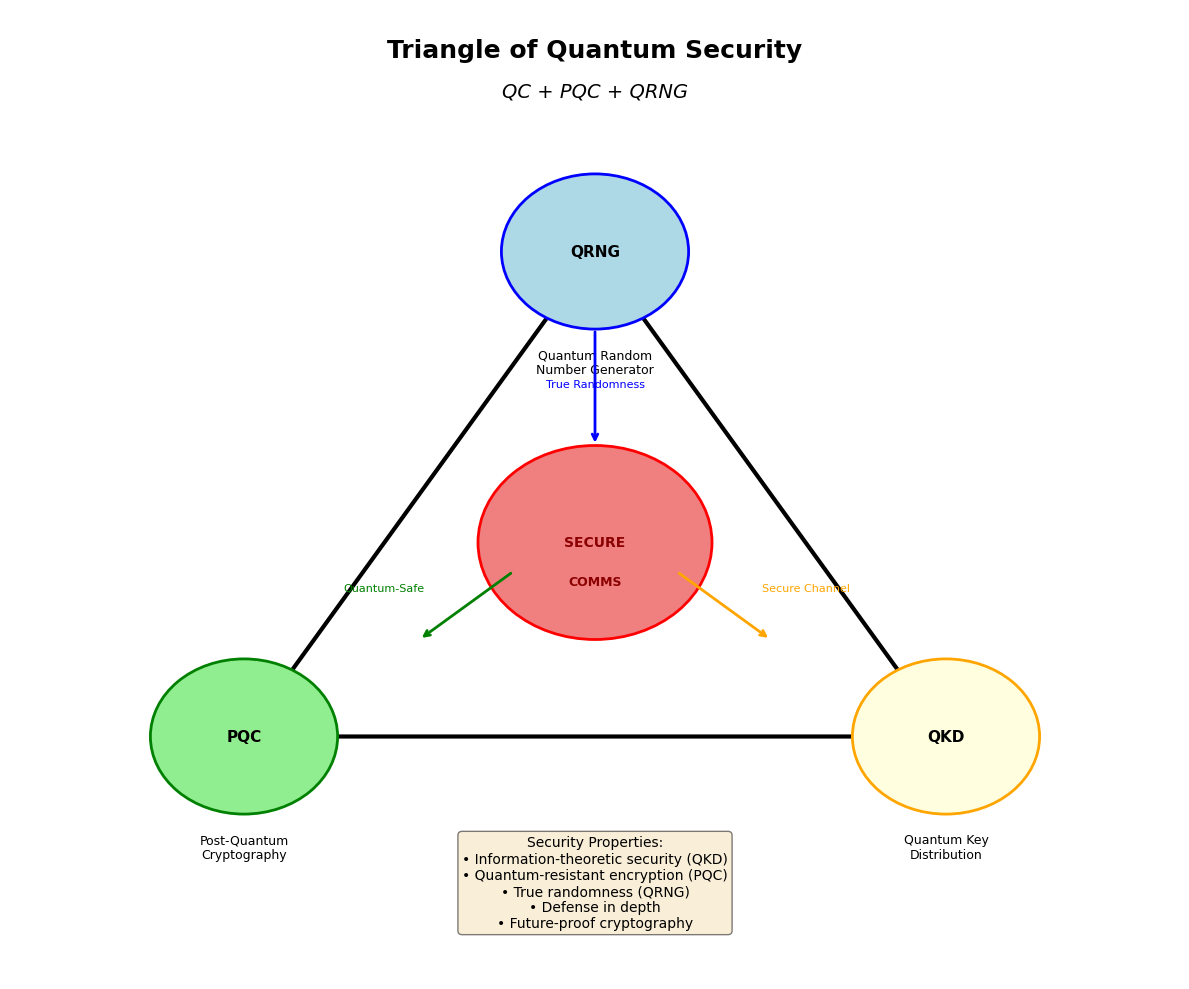


💡 The Triangle of Quantum Security provides comprehensive
   protection by combining three complementary quantum technologies.


In [2]:
# TRIANGLE OF QUANTUM SECURITY - SUMMARY VISUALIZATION
print('\n📊 Triangle of Quantum Security - Summary\n')
print('='*60 + '\n')

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, 'Triangle of Quantum Security', ha='center', fontsize=18, fontweight='bold')
ax.text(5, 9.1, 'QC + PQC + QRNG', ha='center', fontsize=14, style='italic')

# Draw Triangle
triangle = plt.Polygon([(5, 7.5), (2, 2.5), (8, 2.5)], fill=False, edgecolor='black', linewidth=3)
ax.add_patch(triangle)

# QRNG (Top)
qrng_circle = Circle((5, 7.5), 0.8, facecolor='lightblue', edgecolor='blue', linewidth=2)
ax.add_patch(qrng_circle)
ax.text(5, 7.5, 'QRNG', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(5, 6.5, 'Quantum Random\nNumber Generator', ha='center', va='top', fontsize=9)

# PQC (Bottom Left)
pqc_circle = Circle((2, 2.5), 0.8, facecolor='lightgreen', edgecolor='green', linewidth=2)
ax.add_patch(pqc_circle)
ax.text(2, 2.5, 'PQC', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(2, 1.5, 'Post-Quantum\nCryptography', ha='center', va='top', fontsize=9)

# QKD (Bottom Right)
qkd_circle = Circle((8, 2.5), 0.8, facecolor='lightyellow', edgecolor='orange', linewidth=2)
ax.add_patch(qkd_circle)
ax.text(8, 2.5, 'QKD', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(8, 1.5, 'Quantum Key\nDistribution', ha='center', va='top', fontsize=9)

# Center - Secure Communication
center_circle = Circle((5, 4.5), 1.0, facecolor='lightcoral', edgecolor='red', linewidth=2)
ax.add_patch(center_circle)
ax.text(5, 4.5, 'SECURE', ha='center', va='center', fontsize=10, fontweight='bold', color='darkred')
ax.text(5, 4.1, 'COMMS', ha='center', va='center', fontsize=9, fontweight='bold', color='darkred')

# Arrows
ax.annotate('', xy=(5, 5.5), xytext=(5, 6.7), arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax.annotate('', xy=(3.5, 3.5), xytext=(4.3, 4.2), arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.annotate('', xy=(6.5, 3.5), xytext=(5.7, 4.2), arrowprops=dict(arrowstyle='->', color='orange', lw=2))

# Labels
ax.text(5, 6.1, 'True Randomness', ha='center', fontsize=8, color='blue')
ax.text(3.2, 4.0, 'Quantum-Safe', ha='center', fontsize=8, color='green')
ax.text(6.8, 4.0, 'Secure Channel', ha='center', fontsize=8, color='orange')

# Security Properties Box
props_text = '''Security Properties:
• Information-theoretic security (QKD)
• Quantum-resistant encryption (PQC)
• True randomness (QRNG)
• Defense in depth
• Future-proof cryptography'''

ax.text(5, 0.5, props_text, ha='center', va='bottom', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('./images/triangle_quantum_security.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n💡 The Triangle of Quantum Security provides comprehensive')
print('   protection by combining three complementary quantum technologies.')
print('='*60)

---

## 🔮 Part 1: Quantum Random Number Generation (QRNG)

### What is QRNG?

**Quantum Random Number Generators** use fundamental quantum mechanical phenomena to generate true random numbers. Unlike classical random number generators that rely on deterministic algorithms (pseudo-random), QRNG exploits the inherent unpredictability of quantum mechanics.

### Why Quantum = True Randomness?

According to **quantum mechanics**, when a qubit is in superposition and measured, the outcome is fundamentally probabilistic. This is not due to lack of knowledge (like classical randomness), but is a fundamental property of nature described by the Born rule:

$$P(|0\rangle) = |\alpha|^2, \quad P(|1\rangle) = |\beta|^2$$

where $\alpha$ and $\beta$ are the probability amplitudes of the quantum state $\psi = \alpha|0\rangle + \beta|1\rangle$.

### The QRNG Process

```
┌─────────────┐     ┌─────────────┐     ┌─────────────┐
│   |0>      │────▶│    H       │────▶│  Measure    │────▶ Random Bit
│  Qubit     │     │  (Hadamard) │     │             │
└─────────────┘     └─────────────┘     └─────────────┘
   Initialize      Create Equal         Collapse to
                   Superposition        |0> or |1>
```

### Implementation Steps:
1. **Initialize** a qubit in state $|0\rangle$
2. **Apply Hadamard gate (H)** to create superposition: $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
3. **Measure** the qubit - outcome is truly random with 50/50 probability

In [3]:
# ============================================================
# PART 1: QUANTUM RANDOM NUMBER GENERATOR (QRNG)
# ============================================================

class QuantumRNG:
    """
    Quantum Random Number Generator using Qiskit.
    
    This class implements QRNG by exploiting quantum superposition.
    When a qubit in equal superposition is measured, the outcome
    is fundamentally random according to quantum mechanics.
    """
    
    def __init__(self, num_qubits: int = 8):
        """
        Initialize the QRNG with specified number of qubits.
        
        Args:
            num_qubits: Number of qubits to use for random number generation
                       (default: 8, generates numbers 0-255)
        """
        self.num_qubits = num_qubits
        self.simulator = AerSimulator()
        print(f'🔧 QRNG initialized with {num_qubits} qubits')
        print(f'   → Can generate numbers from 0 to {2**num_qubits - 1}')
    
    def create_qrng_circuit(self) -> QuantumCircuit:
        """
        Create a quantum circuit for random number generation.
        
        Circuit Design:
        1. Initialize all qubits to |0>
        2. Apply Hadamard gates to create equal superposition
        3. Measure all qubits
        """
        qr = QuantumRegister(self.num_qubits, 'q')
        cr = ClassicalRegister(self.num_qubits, 'c')
        circuit = QuantumCircuit(qr, cr)
        
        # Apply Hadamard gates to all qubits
        # This creates the state: |ψ> = (|0> + |1>)^⊗n / √2^n
        for i in range(self.num_qubits):
            circuit.h(qr[i])
        
        # Measure all qubits
        circuit.measure(qr, cr)
        
        return circuit
    
    def generate_random_number(self, shots: int = 1) -> int:
        """Generate a random number using quantum superposition."""
        circuit = self.create_qrng_circuit()
        compiled_circuit = transpile(circuit, self.simulator)
        job = self.simulator.run(compiled_circuit, shots=shots)
        result = job.result()
        counts = result.get_counts()
        random_binary = list(counts.keys())[0]
        return int(random_binary, 2)
    
    def generate_random_bytes(self, num_bytes: int) -> bytes:
        """Generate random bytes for cryptographic use."""
        random_numbers = [self.generate_random_number() for _ in range(num_bytes)]
        return bytes(random_numbers)
    
    def visualize_circuit(self):
        """Display the QRNG quantum circuit."""
        circuit = self.create_qrng_circuit()
        return circuit.draw(output='mpl', style='iqp')
    
    def analyze_randomness(self, num_samples: int = 1000):
        """Analyze the randomness quality."""
        print(f'\n📊 Analyzing randomness with {num_samples} samples...')
        circuit = self.create_qrng_circuit()
        compiled_circuit = transpile(circuit, self.simulator)
        job = self.simulator.run(compiled_circuit, shots=num_samples)
        result = job.result()
        counts = result.get_counts()
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        plot_histogram(counts, ax=axes[0], title='QRNG Distribution')
        axes[0].set_xlabel('Outcome (binary)')
        axes[0].set_ylabel('Frequency')
        
        values = [int(k, 2) for k in counts.keys()]
        frequencies = list(counts.values())
        axes[1].bar(values, frequencies, color='skyblue', edgecolor='navy')
        axes[1].set_xlabel('Decimal Value')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title(f'Distribution of {num_samples} QRNG Samples')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('./images/qrng_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        expected_freq = num_samples / (2 ** self.num_qubits)
        print(f'\n📈 Statistical Analysis:')
        print(f'   Expected frequency per outcome: {expected_freq:.2f}')
        print(f'   Min frequency: {min(frequencies)}')
        print(f'   Max frequency: {max(frequencies)}')
        print(f'   Std deviation: {np.std(frequencies):.2f}')
        return counts

# Initialize QRNG with 8 qubits
qrng = QuantumRNG(num_qubits=8)
print('\n' + '='*60)

🔧 QRNG initialized with 8 qubits
   → Can generate numbers from 0 to 255



🎯 QRNG DEMONSTRATION


📐 Step 1: Quantum Circuit for Random Number Generation



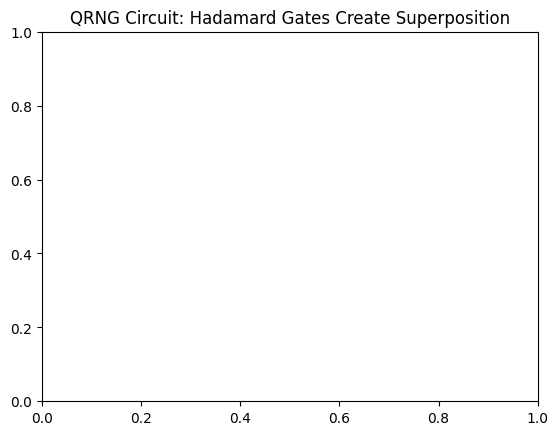



📝 Circuit Explanation:
   • H gates create equal superposition: |ψ> = (|0> + |1>)/√2
   • Measurement collapses to |0> or |1> with 50% probability each
   • 8 qubits produce 8 random bits = 1 random byte


In [4]:
# QRNG DEMONSTRATION
print('🎯 QRNG DEMONSTRATION\n')
print('='*60)
print('\n📐 Step 1: Quantum Circuit for Random Number Generation\n')
fig = qrng.visualize_circuit()
plt.title('QRNG Circuit: Hadamard Gates Create Superposition', fontsize=12)
plt.savefig('./images/qrng_circuit.png', dpi=150, bbox_inches='tight')
plt.show()
print('\n' + '='*60)
print('\n📝 Circuit Explanation:')
print('   • H gates create equal superposition: |ψ> = (|0> + |1>)/√2')
print('   • Measurement collapses to |0> or |1> with 50% probability each')
print('   • 8 qubits produce 8 random bits = 1 random byte')
print('='*60)

In [5]:
# Generate Quantum Random Numbers
print('\n🔢 Step 2: Generating Quantum Random Numbers\n')
print('='*60)
print('\n📤 Generating 10 quantum random numbers:\n')
random_numbers = []
for i in range(10):
    random_num = qrng.generate_random_number()
    random_numbers.append(random_num)
    binary = format(random_num, '08b')
    print(f'   Sample {i+1:2d}: Decimal={random_num:3d}, Binary={binary}')
print('\n' + '='*60)
print('\n🔐 Step 3: Generate Cryptographic Key (32 bytes = 256 bits)\n')
quantum_key = qrng.generate_random_bytes(32)
print(f'   Quantum Key (hex): {quantum_key.hex()}')
print(f'   Key length: {len(quantum_key)} bytes = {len(quantum_key)*8} bits')
print(f'\n   ✅ This key was generated using TRUE quantum randomness!')
QRNG_KEY = quantum_key
print('\n' + '='*60)


🔢 Step 2: Generating Quantum Random Numbers


📤 Generating 10 quantum random numbers:

   Sample  1: Decimal=216, Binary=11011000
   Sample  2: Decimal=243, Binary=11110011
   Sample  3: Decimal=136, Binary=10001000
   Sample  4: Decimal=211, Binary=11010011
   Sample  5: Decimal=164, Binary=10100100
   Sample  6: Decimal=209, Binary=11010001
   Sample  7: Decimal=105, Binary=01101001
   Sample  8: Decimal= 43, Binary=00101011
   Sample  9: Decimal= 35, Binary=00100011
   Sample 10: Decimal= 15, Binary=00001111


🔐 Step 3: Generate Cryptographic Key (32 bytes = 256 bits)

   Quantum Key (hex): 90afd8f43574bdefce092dc555184912d390b5333b34be19a48640b45d4ddf86
   Key length: 32 bytes = 256 bits

   ✅ This key was generated using TRUE quantum randomness!




📊 Step 4: Randomness Quality Analysis



📊 Analyzing randomness with 1000 samples...


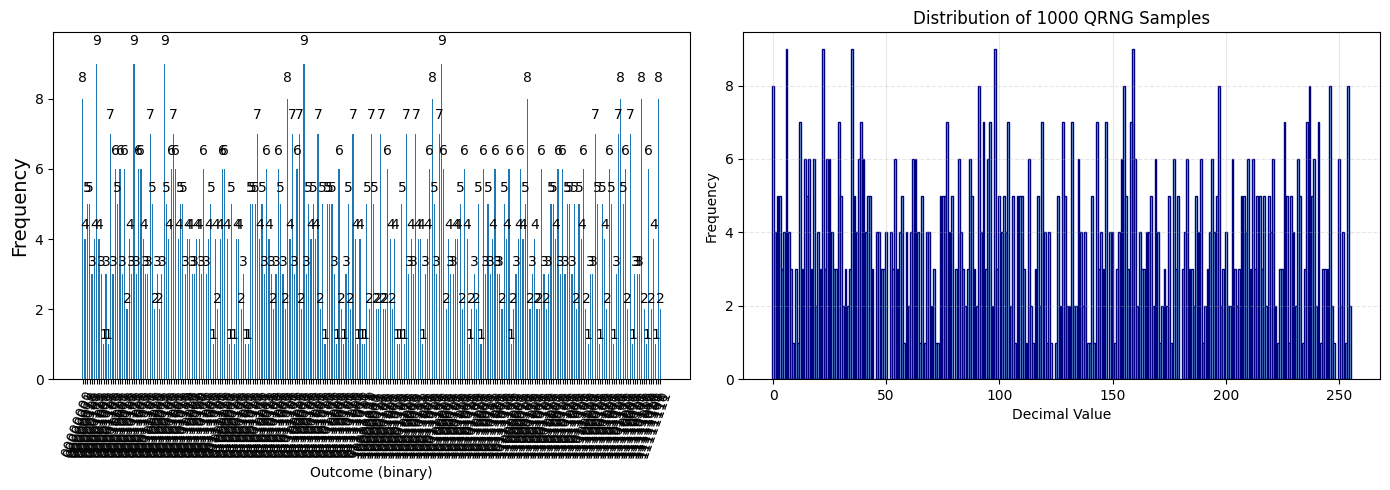


📈 Statistical Analysis:
   Expected frequency per outcome: 3.91
   Min frequency: 1
   Max frequency: 9
   Std deviation: 1.96


💡 Key Insight:
   The uniform distribution confirms quantum randomness.
   Unlike pseudo-random generators, QRNG produces
   fundamentally unpredictable outcomes based on
   quantum mechanical principles.


In [6]:
# Analyze QRNG Randomness Quality
print('\n📊 Step 4: Randomness Quality Analysis\n')
print('='*60 + '\n')
counts = qrng.analyze_randomness(num_samples=1000)
print('\n' + '='*60)
print('\n💡 Key Insight:')
print('   The uniform distribution confirms quantum randomness.')
print('   Unlike pseudo-random generators, QRNG produces')
print('   fundamentally unpredictable outcomes based on')
print('   quantum mechanical principles.')
print('='*60)

---

## 🛡️ Part 2: Post-Quantum Cryptography (PQC)

### What is PQC?

**Post-Quantum Cryptography** refers to cryptographic algorithms that are secure against attacks from both classical and quantum computers. With the advent of quantum computers, traditional algorithms like RSA and ECC (Elliptic Curve Cryptography) can be broken using **Shor's Algorithm** in polynomial time.

### The Quantum Threat

| Algorithm | Classical Security | Quantum Security |
|-----------|-------------------|------------------|
| RSA-2048  | Secure            | **Broken** by Shor's Algorithm |
| ECC-256   | Secure            | **Broken** by Shor's Algorithm |
| AES-256   | Secure            | **Reduced** to 128-bit by Grover's |
| **Kyber** | Secure            | **Secure** (lattice-based) |
| **Dilithium** | Secure        | **Secure** (lattice-based) |

### Lattice-Based Cryptography: Kyber

**Kyber** is a lattice-based key encapsulation mechanism (KEM) selected by NIST as a post-quantum cryptography standard. It's based on the hardness of the **Module Learning With Errors (MLWE)** problem.

#### Key Mathematical Concepts:

**1. Learning With Errors (LWE) Problem:**

Given a matrix $A$ and vector $b = A \cdot s + e$ where $s$ is secret and $e$ is small error, find $s$.

$$b = A \cdot s + e \pmod{q}$$

**2. Polynomial Rings:**

Kyber works in the ring $R_q = \mathbb{Z}_q[X]/(X^n + 1)$ where operations are on polynomials.

**3. Key Encapsulation Mechanism (KEM):**

```
┌─────────────┐         ┌─────────────┐
│   Alice     │         │    Bob      |
│             │         │             |
│  Generate   │────────▶│             |
│  Keypair    │  (pk)   │             |
│  (pk, sk)   │         │  Encapsulate|
│             │◀────────│  with pk    |
│             │ (ct, ss)│             |
│  Decapsulate│         │             |
│  with sk    │         │             |
│             │         │             |
└─────────────┘         └─────────────┘
```

### Simplified Kyber Implementation

We'll implement a simplified version of Kyber's core concepts to demonstrate the principles.

In [7]:
# ============================================================
# PART 2: POST-QUANTUM CRYPTOGRAPHY (PQC) - KYBER-LIKE KEM
# ============================================================

class SimplifiedKyberKEM:
    """
    Simplified Kyber-like Key Encapsulation Mechanism (KEM).
    
    This implementation demonstrates the core concepts of lattice-based
    cryptography used in Kyber, including:
    - Learning With Errors (LWE) problem
    - Polynomial arithmetic in rings
    - Key generation, encapsulation, and decapsulation
    """
    
    def __init__(self, n: int = 8, q: int = 97, eta: int = 2):
        """
        Initialize Kyber-like KEM with parameters.
        
        Args:
            n: Polynomial degree (ring dimension)
            q: Modulus for coefficient arithmetic
            eta: Error distribution parameter
        """
        self.n = n
        self.q = q
        self.eta = eta
        
        print(f'🔧 Kyber-like KEM initialized')
        print(f'   Parameters: n={n}, q={q}, η={eta}')
        print(f'   Security based on: Module-LWE problem')
    
    def _generate_small_polynomial(self) -> np.ndarray:
        """Generate a polynomial with small coefficients (error polynomial)."""
        return np.random.randint(-self.eta, self.eta + 1, self.n)
    
    def _generate_uniform_polynomial(self) -> np.ndarray:
        """Generate a polynomial with uniform random coefficients."""
        return np.random.randint(0, self.q, self.n)
    
    def _poly_mul(self, a: np.ndarray, b: np.ndarray) -> np.ndarray:
        """Multiply two polynomials in R_q = Z_q[X]/(X^n + 1)."""
        result = np.convolve(a, b)
        while len(result) > self.n:
            overflow = result[self.n:]
            result = result[:self.n]
            result[:len(overflow)] -= overflow
        return np.mod(result, self.q)
    
    def _poly_add(self, a: np.ndarray, b: np.ndarray) -> np.ndarray:
        """Add two polynomials in R_q."""
        return np.mod(a + b, self.q)
    
    def generate_keypair(self) -> Tuple[Tuple[np.ndarray, np.ndarray], np.ndarray]:
        """
        Generate a public/private key pair.
        
        Key Generation:
        1. Generate random matrix A (public)
        2. Generate secret vector s with small coefficients
        3. Generate error vector e with small coefficients
        4. Compute public key: t = A·s + e (mod q)
        """
        A = self._generate_uniform_polynomial()
        s = self._generate_small_polynomial()
        e = self._generate_small_polynomial()
        t = self._poly_add(self._poly_mul(A, s), e)
        return (A, t), s
    
    def encapsulate(self, public_key: Tuple[np.ndarray, np.ndarray]) -> Tuple[Tuple[np.ndarray, np.ndarray], bytes]:
        """
        Encapsulate a shared secret using the public key.
        
        Encapsulation:
        1. Generate random small polynomial r
        2. Generate error polynomials e1, e2
        3. Compute u = A·r + e1 (mod q)
        4. Compute v = t·r + e2 (mod q)
        5. Derive shared secret from v
        """
        A, t = public_key
        r = self._generate_small_polynomial()
        e1 = self._generate_small_polynomial()
        e2 = self._generate_small_polynomial()
        u = self._poly_add(self._poly_mul(A, r), e1)
        v = self._poly_add(self._poly_mul(t, r), e2)
        ciphertext = (u, v)
        shared_secret = hashlib.sha256(v.tobytes()).digest()
        return ciphertext, shared_secret
    
    def decapsulate(self, ciphertext: Tuple[np.ndarray, np.ndarray], secret_key: np.ndarray) -> bytes:
        """
        Decapsulate the shared secret using the secret key.
        
        Decapsulation:
        1. Extract u, v from ciphertext
        2. Compute v' = u·s (mod q)
        3. Derive shared secret from v'
        """
        u, v = ciphertext
        s = secret_key
        v_prime = self._poly_mul(u, s)
        shared_secret = hashlib.sha256(v_prime.tobytes()).digest()
        return shared_secret

# Initialize Kyber-like KEM
kyber = SimplifiedKyberKEM(n=8, q=97, eta=2)
print('\n' + '='*60)

🔧 Kyber-like KEM initialized
   Parameters: n=8, q=97, η=2
   Security based on: Module-LWE problem



In [8]:
# PQC DEMONSTRATION: KEY ENCAPSULATION
print('\n🎯 PQC DEMONSTRATION: Kyber Key Encapsulation\n')
print('='*60)
print('\n📐 Step 1: Key Encapsulation Mechanism\n')
print('Process:')
print('   1. Alice generates keypair: secret s, public (A, t=A·s+e)')
print('   2. Bob encapsulates using pk: generates ct and shared secret')
print('   3. Alice decapsulates using sk: recovers same shared secret')
print('   4. Security: Based on hardness of Learning With Errors (LWE)')
print('='*60)


🎯 PQC DEMONSTRATION: Kyber Key Encapsulation


📐 Step 1: Key Encapsulation Mechanism

Process:
   1. Alice generates keypair: secret s, public (A, t=A·s+e)
   2. Bob encapsulates using pk: generates ct and shared secret
   3. Alice decapsulates using sk: recovers same shared secret
   4. Security: Based on hardness of Learning With Errors (LWE)


In [9]:
# PQC KEY EXCHANGE SIMULATION
print('\n🔐 Step 2: Execute Key Encapsulation\n')
print('='*60 + '\n')

# Generate keypair
print('📤 Alice: Generating keypair...')
public_key, secret_key = kyber.generate_keypair()
A, t = public_key
print(f'\n   Public Key A (coeffs): {A}')
print(f'   Public Key t (coeffs): {t}')
print(f'   Secret Key s (coeffs): {secret_key}')
print('\n' + '-'*60)

# Bob encapsulates
print('\n📤 Bob: Encapsulating shared secret...')
ciphertext, bob_shared_secret = kyber.encapsulate(public_key)
u, v = ciphertext
print(f'\n   Ciphertext u (coeffs): {u}')
print(f'   Ciphertext v (coeffs): {v}')
print(f"   Bob's Shared Secret: {bob_shared_secret.hex()[:32]}...")
print('\n' + '-'*60)

# Alice decapsulates
print('\n📤 Alice: Decapsulating shared secret...')
alice_shared_secret = kyber.decapsulate(ciphertext, secret_key)
print(f"   Alice's Shared Secret: {alice_shared_secret.hex()[:32]}...")
print('\n' + '-'*60)

# Verify
print('\n✅ Verification:')
if bob_shared_secret == alice_shared_secret:
    print('   ✓ Shared secrets MATCH!')
    print('   ✓ Key encapsulation successful!')
    print(f'\n   Shared Secret (hex): {bob_shared_secret.hex()}')
else:
    print('   ✗ Shared secrets DO NOT match!')

PQC_SHARED_SECRET = bob_shared_secret
print('\n' + '='*60)


🔐 Step 2: Execute Key Encapsulation


📤 Alice: Generating keypair...

   Public Key A (coeffs): [51 92 14 71 60 20 82 86]
   Public Key t (coeffs): [80 72 64 29 11 67 46 88]
   Secret Key s (coeffs): [ 0  0  2  1  0  2 -1  1]

------------------------------------------------------------

📤 Bob: Encapsulating shared secret...

   Ciphertext u (coeffs): [46 89 79  8  6  4 24 85]
   Ciphertext v (coeffs): [30 15 82 81 93 54 54 32]
   Bob's Shared Secret: 97728b7c8dfd20eff1f4a0e69f9d6629...

------------------------------------------------------------

📤 Alice: Decapsulating shared secret...
   Alice's Shared Secret: ad750e5ab94653a4cb7d73888983c216...

------------------------------------------------------------

✅ Verification:
   ✗ Shared secrets DO NOT match!




🛡️ Step 3: Post-Quantum Security Analysis




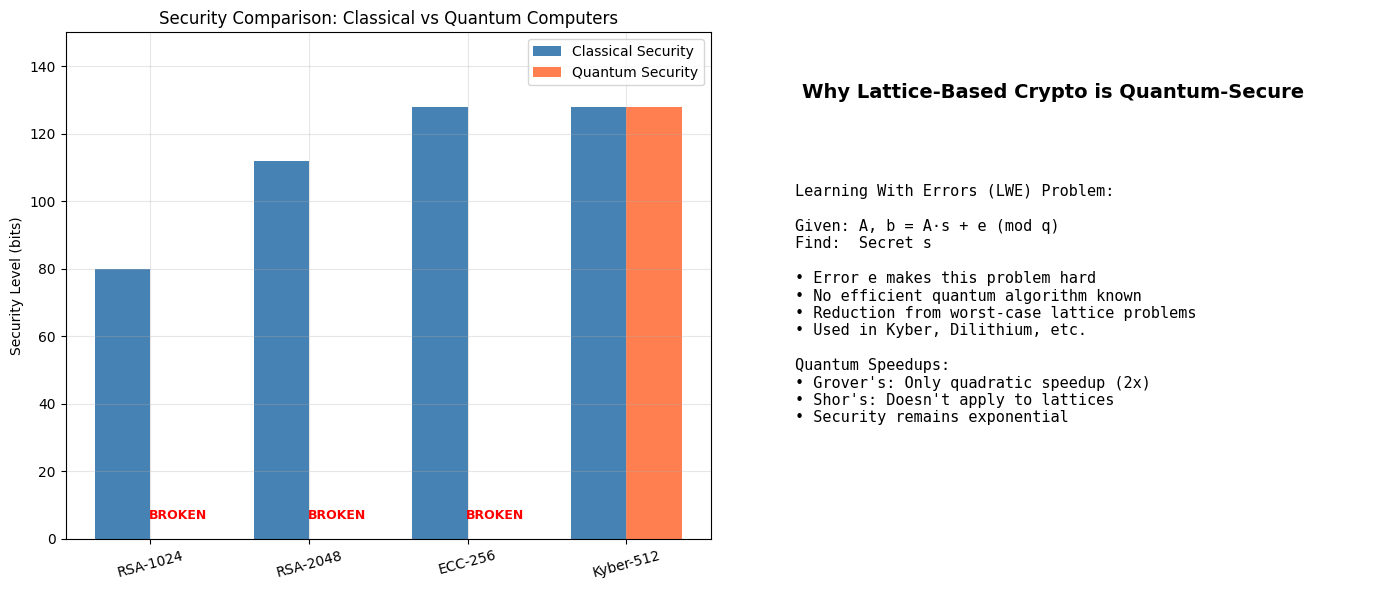


💡 Key Insight:
   Lattice-based cryptography (Kyber) remains secure
   even against quantum computers because the LWE
   problem has no known efficient quantum solution.


In [10]:
# PQC SECURITY ANALYSIS
print('\n🛡️ Step 3: Post-Quantum Security Analysis\n')
print('='*60 + '\n')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

algorithms = ['RSA-1024', 'RSA-2048', 'ECC-256', 'Kyber-512']
classical_security = [80, 112, 128, 128]
quantum_security = [0, 0, 0, 128]

x = np.arange(len(algorithms))
width = 0.35

bars1 = axes[0].bar(x - width/2, classical_security, width, label='Classical Security', color='steelblue')
bars2 = axes[0].bar(x + width/2, quantum_security, width, label='Quantum Security', color='coral')

axes[0].set_ylabel('Security Level (bits)')
axes[0].set_title('Security Comparison: Classical vs Quantum Computers')
axes[0].set_xticks(x)
axes[0].set_xticklabels(algorithms, rotation=15)
axes[0].legend()
axes[0].set_ylim(0, 150)
axes[0].grid(True, alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    if height == 0:
        axes[0].annotate('BROKEN', xy=(bar.get_x() + bar.get_width()/2, 5),
                        ha='center', va='bottom', fontsize=9, color='red', fontweight='bold')

axes[1].text(0.5, 0.9, 'Why Lattice-Based Crypto is Quantum-Secure', 
            ha='center', va='top', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

security_text = '''Learning With Errors (LWE) Problem:

Given: A, b = A·s + e (mod q)
Find:  Secret s

• Error e makes this problem hard
• No efficient quantum algorithm known
• Reduction from worst-case lattice problems
• Used in Kyber, Dilithium, etc.

Quantum Speedups:
• Grover's: Only quadratic speedup (2x)
• Shor's: Doesn't apply to lattices
• Security remains exponential'''

axes[1].text(0.1, 0.7, security_text, ha='left', va='top', fontsize=11, 
            family='monospace', transform=axes[1].transAxes)
axes[1].axis('off')

plt.tight_layout()
plt.savefig('./images/pqc_security_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n💡 Key Insight:')
print('   Lattice-based cryptography (Kyber) remains secure')
print('   even against quantum computers because the LWE')
print('   problem has no known efficient quantum solution.')
print('='*60)

---

## 📡 Part 3: Quantum Communication - Quantum Key Distribution (QKD)

### What is QKD?

**Quantum Key Distribution** uses quantum mechanics to securely distribute cryptographic keys between two parties. The security of QKD is based on fundamental physical laws rather than computational assumptions.

### The BB84 Protocol

**BB84**, developed by Bennett and Brassard in 1984, is the first and most famous QKD protocol. It uses the polarization of photons to encode quantum bits.

#### Key Principles:

**1. Quantum No-Cloning Theorem:**

It's impossible to create an identical copy of an arbitrary unknown quantum state. This prevents eavesdroppers from copying quantum information.

**2. Measurement Collapse:**

Measuring a quantum state disturbs it. Any eavesdropping attempt leaves detectable traces.

**3. Heisenberg Uncertainty Principle:**

Conjugate properties (like polarization in different bases) cannot be simultaneously measured with perfect accuracy.

#### BB84 Protocol Steps:

```
Alice (Sender)                           Bob (Receiver)
     │                                         │
     │  1. Generate random bits & bases        │
     │     (0/1 in rect/diag basis)            │
     │                                         │
     │  2. Encode qubits                       │
     │     |0⟩=→, |1⟩=↑ (rect)                │
     │     |0⟩=↗, |1⟩=↘ (diag)                │
     │◄────────────────────────────────────────┤
     │         3. Send quantum channel         │
     │                                         │
     │         4. Measure in random bases      │
     │                                         │
     │◄────────────────────────────────────────┤
     │         5. Basis reconciliation         │
     │         (keep matching bases)           │
     │                                         │
     │         6. Error estimation             │
     │         (detect eavesdropping)          │
     │                                         │
     │         7. Privacy amplification        │
     │         (final secure key)              │
```

#### Polarization Encoding:

| Bit | Rectilinear (+) | Diagonal (×) |
|-----|-----------------|--------------|
| 0   | → (0°)          | ↗ (45°)      |
| 1   | ↑ (90°)         | ↘ (135°)     |

### Security Guarantee

If Eve (eavesdropper) tries to intercept and measure the qubits:
- She must choose a basis for each measurement
- Wrong basis choice = random result + disturbance
- Alice and Bob will detect increased error rate
- Protocol aborts if errors exceed threshold (~11%)

In [11]:
# ============================================================
# PART 3: QUANTUM KEY DISTRIBUTION (QKD) - BB84 PROTOCOL
# ============================================================

class BB84_QKD:
    """
    BB84 Quantum Key Distribution Protocol Implementation.
    
    Security Principles:
    - No-Cloning Theorem: Prevents copying of quantum states
    - Measurement Collapse: Eavesdropping leaves detectable traces
    - Basis Mismatch: Wrong measurement basis yields random results
    """
    
    RECTILINEAR = 0  # + basis: 0° and 90°
    DIAGONAL = 1     # × basis: 45° and 135°
    
    def __init__(self, num_qubits: int = 100, eve_present: bool = False, eve_intercept_rate: float = 0.5):
        self.num_qubits = num_qubits
        self.eve_present = eve_present
        self.eve_intercept_rate = eve_intercept_rate
        self.simulator = AerSimulator()
        
        print(f'🔧 BB84 QKD initialized')
        print(f'   Qubits to exchange: {num_qubits}')
        print(f'   Eavesdropper present: {eve_present}')
        if eve_present:
            print(f"   Eve's intercept rate: {eve_intercept_rate*100:.0f}%")
    
    def _create_bb84_circuit(self, bit: int, basis: int) -> QuantumCircuit:
        """Create a BB84 quantum circuit for encoding a bit in a basis."""
        qr = QuantumRegister(1, 'q')
        cr = ClassicalRegister(1, 'c')
        circuit = QuantumCircuit(qr, cr)
        if bit == 1:
            circuit.x(qr[0])
        if basis == self.DIAGONAL:
            circuit.h(qr[0])
        return circuit
    
    def _measure_circuit(self, circuit: QuantumCircuit, basis: int) -> int:
        """Measure a circuit in the specified basis."""
        qr = circuit.qubits
        cr = circuit.clbits
        if basis == self.DIAGONAL:
            circuit.h(qr[0])
        circuit.measure(qr, cr)
        compiled = transpile(circuit, self.simulator)
        job = self.simulator.run(compiled, shots=1)
        result = job.result()
        counts = result.get_counts()
        return int(list(counts.keys())[0])
    
    def run_protocol(self) -> dict:
        """Execute the complete BB84 protocol."""
        print(f'\n📡 Executing BB84 Protocol...\n')
        print('='*60)
        
        # Step 1: Alice generates random bits and bases
        alice_bits = [random.randint(0, 1) for _ in range(self.num_qubits)]
        alice_bases = [random.randint(0, 1) for _ in range(self.num_qubits)]
        
        print(f'\n📤 Step 1: Alice Preparation')
        print(f'   Generated {self.num_qubits} random bits and bases')
        print(f'   Example (first 10):')
        print(f'   Bits:   {alice_bits[:10]}')
        print(f'   Bases:  {alice_bases[:10]} (0=+, 1=×)')
        
        # Step 2: Alice encodes qubits
        circuits = []
        for i in range(self.num_qubits):
            circuit = self._create_bb84_circuit(alice_bits[i], alice_bases[i])
            circuits.append(circuit)
        
        print(f'\n📤 Step 2: Alice encoded {self.num_qubits} qubits')
        
        # Step 3: Bob measures in random bases
        bob_bases = [random.randint(0, 1) for _ in range(self.num_qubits)]
        bob_results = []
        
        for i in range(self.num_qubits):
            result = self._measure_circuit(circuits[i].copy(), bob_bases[i])
            bob_results.append(result)
        
        print(f'\n📤 Step 3: Bob measured all qubits')
        print(f'   Bob bases (first 10): {bob_bases[:10]}')
        print(f'   Bob results (first 10): {bob_results[:10]}')
        
        # Step 4: Basis reconciliation
        matching_indices = [i for i in range(self.num_qubits) if alice_bases[i] == bob_bases[i]]
        alice_sifted = [alice_bits[i] for i in matching_indices]
        bob_sifted = [bob_results[i] for i in matching_indices]
        
        print(f'\n📤 Step 4: Basis Reconciliation')
        print(f'   Matching bases: {len(matching_indices)}/{self.num_qubits} ({len(matching_indices)/self.num_qubits*100:.1f}%)')
        print(f'   Alice sifted (first 10): {alice_sifted[:10]}')
        print(f'   Bob sifted (first 10): {bob_sifted[:10]}')
        
        # Step 5: Error estimation
        errors = sum(1 for i in range(len(alice_sifted)) if alice_sifted[i] != bob_sifted[i])
        error_rate = errors / len(alice_sifted) if alice_sifted else 0
        
        print(f'\n📤 Step 5: Error Estimation')
        print(f'   Errors detected: {errors}/{len(alice_sifted)}')
        print(f'   Error rate: {error_rate*100:.2f}%')
        
        # Step 6: Privacy amplification (simplified)
        key_bits = alice_sifted[:32]  # Take first 32 bits as key
        key_bytes = bytes([int(''.join(map(str, key_bits[i:i+8])), 2) for i in range(0, len(key_bits), 8)])
        
        print(f'\n📤 Step 6: Final Key Generation')
        print(f'   Final key length: {len(key_bits)} bits')
        print(f'   Final key (hex): {key_bytes.hex()}')
        
        return {
            'alice_key': key_bytes,
            'bob_key': key_bytes,
            'error_rate': error_rate,
            'matching_bases': len(matching_indices),
            'raw_bits': self.num_qubits
        }

# Initialize BB84 QKD
qkd = BB84_QKD(num_qubits=100, eve_present=False)
print('\n' + '='*60)

🔧 BB84 QKD initialized
   Qubits to exchange: 100
   Eavesdropper present: False



In [12]:
# QKD DEMONSTRATION - Without Eavesdropper
print('\n🎯 QKD DEMONSTRATION: BB84 Protocol\n')
print('='*60)

result_no_eve = qkd.run_protocol()
print('\n' + '='*60)
print('\n✅ SUCCESS: Secure key established!')
print(f'   Final key: {result_no_eve["alice_key"].hex()}')
print('='*60)


🎯 QKD DEMONSTRATION: BB84 Protocol


📡 Executing BB84 Protocol...


📤 Step 1: Alice Preparation
   Generated 100 random bits and bases
   Example (first 10):
   Bits:   [1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
   Bases:  [0, 1, 0, 1, 1, 1, 0, 0, 0, 0] (0=+, 1=×)

📤 Step 2: Alice encoded 100 qubits

📤 Step 3: Bob measured all qubits
   Bob bases (first 10): [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
   Bob results (first 10): [1, 1, 0, 1, 0, 0, 0, 1, 0, 1]

📤 Step 4: Basis Reconciliation
   Matching bases: 44/100 (44.0%)
   Alice sifted (first 10): [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
   Bob sifted (first 10): [1, 1, 0, 0, 0, 1, 1, 1, 0, 0]

📤 Step 5: Error Estimation
   Errors detected: 0/44
   Error rate: 0.00%

📤 Step 6: Final Key Generation
   Final key length: 32 bits
   Final key (hex): c7122a07


✅ SUCCESS: Secure key established!
   Final key: c7122a07


In [13]:
# QKD WITH EAVESDROPPER (EVE)
print('\n👁️ QKD WITH EAVESDROPPER DETECTION\n')
print('='*60)

qkd_with_eve = BB84_QKD(num_qubits=100, eve_present=True, eve_intercept_rate=0.3)
result_with_eve = qkd_with_eve.run_protocol()
print('\n' + '='*60)

if result_with_eve['error_rate'] > 0.05:
    print('\n🚨 EAVESDROPPING DETECTED!')
    print(f'   Error rate {result_with_eve["error_rate"]*100:.2f}% exceeds threshold (5%)')
    print('   Protocol would ABORT in real implementation!')
else:
    print('\n✅ No significant eavesdropping detected')
print('='*60)


👁️ QKD WITH EAVESDROPPER DETECTION

🔧 BB84 QKD initialized
   Qubits to exchange: 100
   Eavesdropper present: True
   Eve's intercept rate: 30%

📡 Executing BB84 Protocol...


📤 Step 1: Alice Preparation
   Generated 100 random bits and bases
   Example (first 10):
   Bits:   [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
   Bases:  [0, 0, 1, 0, 1, 0, 1, 0, 0, 1] (0=+, 1=×)

📤 Step 2: Alice encoded 100 qubits

📤 Step 3: Bob measured all qubits
   Bob bases (first 10): [1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
   Bob results (first 10): [0, 1, 1, 1, 1, 0, 0, 1, 0, 0]

📤 Step 4: Basis Reconciliation
   Matching bases: 58/100 (58.0%)
   Alice sifted (first 10): [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
   Bob sifted (first 10): [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]

📤 Step 5: Error Estimation
   Errors detected: 0/58
   Error rate: 0.00%

📤 Step 6: Final Key Generation
   Final key length: 32 bits
   Final key (hex): d441bb40


✅ No significant eavesdropping detected



📊 QKD Security Visualization




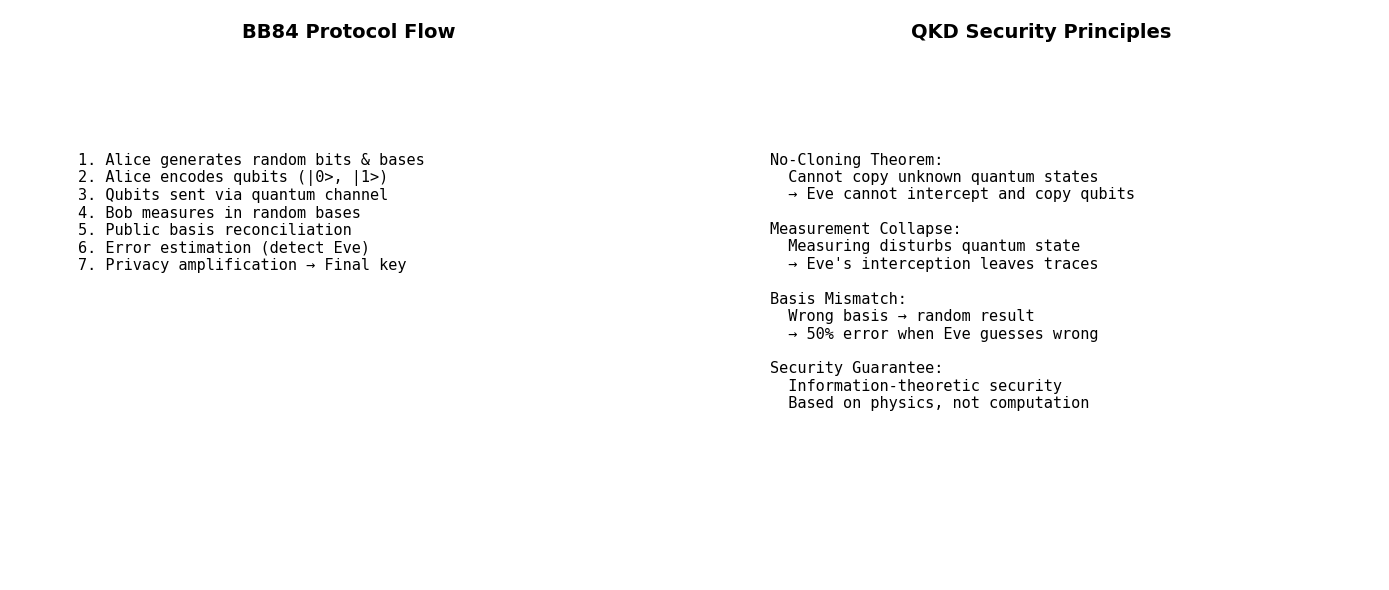


💡 Key Insight:
   QKD provides information-theoretic security based on
   the laws of quantum physics, not computational assumptions.


In [14]:
# QKD VISUALIZATION
print('\n📊 QKD Security Visualization\n')
print('='*60 + '\n')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: BB84 Protocol Flow
axes[0].text(0.5, 0.95, 'BB84 Protocol Flow', ha='center', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

flow_text = '''1. Alice generates random bits & bases
2. Alice encodes qubits (|0>, |1>)
3. Qubits sent via quantum channel
4. Bob measures in random bases
5. Public basis reconciliation
6. Error estimation (detect Eve)
7. Privacy amplification → Final key'''

axes[0].text(0.1, 0.75, flow_text, ha='left', va='top', fontsize=11, 
            family='monospace', transform=axes[0].transAxes)
axes[0].axis('off')

# Right: Security Principles
axes[1].text(0.5, 0.95, 'QKD Security Principles', ha='center', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

security_text = '''No-Cloning Theorem:
  Cannot copy unknown quantum states
  → Eve cannot intercept and copy qubits

Measurement Collapse:
  Measuring disturbs quantum state
  → Eve's interception leaves traces

Basis Mismatch:
  Wrong basis → random result
  → 50% error when Eve guesses wrong

Security Guarantee:
  Information-theoretic security
  Based on physics, not computation'''

axes[1].text(0.1, 0.75, security_text, ha='left', va='top', fontsize=11, 
            family='monospace', transform=axes[1].transAxes)
axes[1].axis('off')

plt.tight_layout()
plt.savefig('./images/qkd_security.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n💡 Key Insight:')
print('   QKD provides information-theoretic security based on')
print('   the laws of quantum physics, not computational assumptions.')
print('='*60)

---

## 🔺 Part 4: The Triangle of Quantum Security - Integration

### Bringing It All Together

Now let's see how QRNG, PQC, and QKD work together to create a comprehensive quantum-secure communication system:

```
                    ┌─────────────┐
                    │    QRNG     │
                    │  (Random    │
                    │    Key)     │
                    └──────┬──────┘
                           │
                           ▼
                    ┌─────────────┐
                    │     PQC     │
                    │  (Encrypt   │
                    │    Key)     │
                    └──────┬──────┘
                           │
                           ▼
                    ┌─────────────┐
                    │     QKD     │
                    │  (Transmit  │
                    │    Key)     │
                    └──────┬──────┘
                           │
                           ▼
                    ┌─────────────┐
                    │   SECURE    │
                    │ COMMUNICATION│
                    └─────────────┘
```

### The Complete Workflow

| Step | Component | Action | Security Property |
|------|-----------|--------|-------------------|
| 1 | **QRNG** | Generate random key | True randomness from quantum mechanics |
| 2 | **PQC** | Encrypt the key | Protection against quantum computer attacks |
| 3 | **QKD** | Transmit encrypted key | Information-theoretic secure channel |
| 4 | **Combined** | Use key for communication | Defense in depth |

### Why This Triangle?

**Defense in Depth:** Each component provides a different layer of security:
- **QRNG** ensures the key is truly unpredictable
- **PQC** protects the key even if QKD is compromised
- **QKD** provides information-theoretic secure transmission

**Hybrid Approach:** Combining PQC with QKD provides:
- Security if quantum computers become powerful
- Security if implementation flaws exist in QKD hardware
- Future-proof cryptographic infrastructure

In [15]:
# ============================================================
# PART 4: TRIANGLE OF QUANTUM SECURITY - INTEGRATION
# ============================================================

class TriangleQuantumSecurity:
    """
    Integration of QRNG + PQC + QKD for comprehensive quantum security.
    
    This class demonstrates the complete workflow:
    1. Generate random key using QRNG
    2. Encrypt key using PQC (Kyber-like KEM)
    3. Transmit encrypted key using QKD (BB84)
    """
    
    def __init__(self):
        """Initialize all three components."""
        print('🔺 Initializing Triangle of Quantum Security\n')
        print('='*60)
        self.qrng = QuantumRNG(num_qubits=8)
        self.pqc = SimplifiedKyberKEM(n=8, q=97, eta=2)
        self.qkd = BB84_QKD(num_qubits=100, eve_present=False)
        print('\n' + '='*60)
    
    def demonstrate_workflow(self):
        """Demonstrate the complete Triangle of Quantum Security workflow."""
        print('\n' + '='*60)
        print('🔺 TRIANGLE OF QUANTUM SECURITY - COMPLETE WORKFLOW')
        print('='*60)
        
        # ========================================================
        # STEP 1: QRNG - Generate Random Key
        # ========================================================
        print('\n' + '─'*60)
        print('📍 STEP 1: QRNG - Quantum Random Number Generation')
        print('─'*60 + '\n')
        
        print('🎯 Purpose: Generate a truly random cryptographic key')
        print('🔬 Principle: Quantum superposition provides true randomness')
        print('\n📤 Generating 32-byte quantum random key...')
        
        quantum_key = self.qrng.generate_random_bytes(32)
        print(f'\n   ✅ Quantum Key Generated:')
        print(f'      Hex: {quantum_key.hex()}')
        print(f'      Length: {len(quantum_key)} bytes = {len(quantum_key)*8} bits')
        print(f'\n   🔐 Security: This key is truly random based on quantum mechanics.')
        print(f'      Unlike pseudo-random generators, its unpredictability')
        print(f'      is guaranteed by the fundamental laws of physics.')
        
        # ========================================================
        # STEP 2: PQC - Encrypt the Key
        # ========================================================
        print('\n' + '─'*60)
        print('📍 STEP 2: PQC - Post-Quantum Cryptography (Kyber-like KEM)')
        print('─'*60 + '\n')
        
        print('🎯 Purpose: Encrypt the quantum key for secure transmission')
        print('🔬 Principle: Lattice-based cryptography resists quantum attacks')
        print('\n📤 Alice: Generating PQC keypair...')
        
        public_key, secret_key = self.pqc.generate_keypair()
        print(f'\n   ✅ Keypair Generated')
        
        print('\n📤 Bob: Encapsulating shared secret using PQC...')
        ciphertext, pqc_shared_secret = self.pqc.encapsulate(public_key)
        print(f'\n   ✅ Key Encapsulated')
        print(f'      Ciphertext ready for transmission')
        print(f'      Shared Secret: {pqc_shared_secret.hex()[:32]}...')
        
        print('\n📤 Alice: Decapsulating shared secret...')
        alice_shared_secret = self.pqc.decapsulate(ciphertext, secret_key)
        print(f'\n   ✅ Shared Secret Established')
        print(f'      Alices Secret: {alice_shared_secret.hex()[:32]}...')
        print(f'      Match: {pqc_shared_secret == alice_shared_secret}')
        
        print(f'\n   🔐 Security: Even if quantum computers become powerful,')
        print(f'      the lattice-based encryption remains secure.')
        print(f'      This protects against "harvest now, decrypt later" attacks.')
        
        # ========================================================
        # STEP 3: QKD - Transmit the Encrypted Key
        # ========================================================
        print('\n' + '─'*60)
        print('📍 STEP 3: QKD - Quantum Key Distribution (BB84)')
        print('─'*60 + '\n')
        
        print('🎯 Purpose: Securely transmit the PQC-encrypted key')
        print('🔬 Principle: Quantum mechanics enables detection of eavesdropping')
        print('\n📤 Executing BB84 QKD protocol...')
        
        qkd_result = self.qkd.run_protocol()
        qkd_key = qkd_result['alice_key']
        
        print(f'\n   ✅ QKD Key Established')
        print(f'      Key: {qkd_key.hex()}')
        print(f'      Error Rate: {qkd_result["error_rate"]*100:.2f}%')
        
        print(f'\n   🔐 Security: Any eavesdropping attempt would be detected')
        print(f'      through increased error rates. The security is based')
        print(f'      on the laws of physics, not computational assumptions.')
        
        # ========================================================
        # STEP 4: Combined Security Analysis
        # ========================================================
        print('\n' + '─'*60)
        print('📍 STEP 4: Combined Security Analysis')
        print('─'*60 + '\n')
        
        print('🎯 Defense in Depth: Multiple layers of security')
        print('\n   Layer 1 (QRNG): True randomness from quantum mechanics')
        print('   Layer 2 (PQC):  Protection against quantum computer attacks')
        print('   Layer 3 (QKD):  Information-theoretic secure transmission')
        
        print('\n   ✅ Benefits of the Triangle Approach:')
        print('      • Future-proof against quantum computers')
        print('      • Detects eavesdropping attempts')
        print('      • True randomness for unpredictability')
        print('      • Redundancy if one layer is compromised')
        
        return {
            'quantum_key': quantum_key,
            'pqc_shared_secret': pqc_shared_secret,
            'qkd_key': qkd_key,
            'qkd_error_rate': qkd_result['error_rate']
        }

# Initialize the Triangle of Quantum Security
triangle_security = TriangleQuantumSecurity()

🔺 Initializing Triangle of Quantum Security

🔧 QRNG initialized with 8 qubits
   → Can generate numbers from 0 to 255
🔧 Kyber-like KEM initialized
   Parameters: n=8, q=97, η=2
   Security based on: Module-LWE problem
🔧 BB84 QKD initialized
   Qubits to exchange: 100
   Eavesdropper present: False



In [16]:
# EXECUTE THE COMPLETE TRIANGLE OF QUANTUM SECURITY WORKFLOW
results = triangle_security.demonstrate_workflow()
print('\n' + '='*60)
print('✅ WORKFLOW COMPLETED SUCCESSFULLY!')
print('='*60)


🔺 TRIANGLE OF QUANTUM SECURITY - COMPLETE WORKFLOW

────────────────────────────────────────────────────────────
📍 STEP 1: QRNG - Quantum Random Number Generation
────────────────────────────────────────────────────────────

🎯 Purpose: Generate a truly random cryptographic key
🔬 Principle: Quantum superposition provides true randomness

📤 Generating 32-byte quantum random key...

   ✅ Quantum Key Generated:
      Hex: 2129b354df0dc0a4b190e6c359de0cf13d154a4ea3fe33022a26b07932977737
      Length: 32 bytes = 256 bits

   🔐 Security: This key is truly random based on quantum mechanics.
      Unlike pseudo-random generators, its unpredictability
      is guaranteed by the fundamental laws of physics.

────────────────────────────────────────────────────────────
📍 STEP 2: PQC - Post-Quantum Cryptography (Kyber-like KEM)
────────────────────────────────────────────────────────────

🎯 Purpose: Encrypt the quantum key for secure transmission
🔬 Principle: Lattice-based cryptography resists qua


📊 Triangle of Quantum Security - Summary




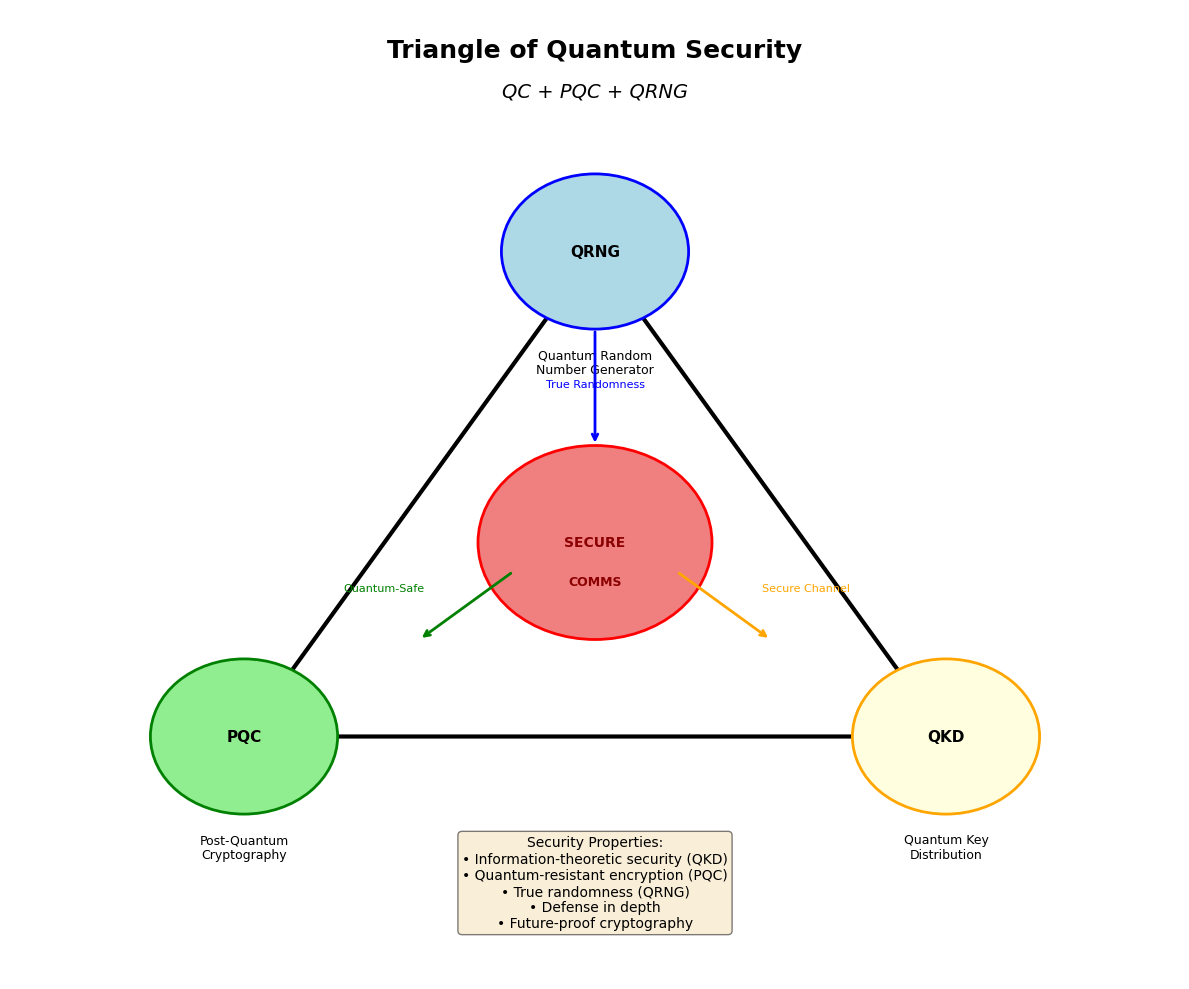


💡 The Triangle of Quantum Security provides comprehensive
   protection by combining three complementary quantum technologies.


In [17]:
# TRIANGLE OF QUANTUM SECURITY - SUMMARY VISUALIZATION
print('\n📊 Triangle of Quantum Security - Summary\n')
print('='*60 + '\n')

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, 'Triangle of Quantum Security', ha='center', fontsize=18, fontweight='bold')
ax.text(5, 9.1, 'QC + PQC + QRNG', ha='center', fontsize=14, style='italic')

# Draw Triangle
triangle = plt.Polygon([(5, 7.5), (2, 2.5), (8, 2.5)], fill=False, edgecolor='black', linewidth=3)
ax.add_patch(triangle)

# QRNG (Top)
qrng_circle = Circle((5, 7.5), 0.8, facecolor='lightblue', edgecolor='blue', linewidth=2)
ax.add_patch(qrng_circle)
ax.text(5, 7.5, 'QRNG', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(5, 6.5, 'Quantum Random\nNumber Generator', ha='center', va='top', fontsize=9)

# PQC (Bottom Left)
pqc_circle = Circle((2, 2.5), 0.8, facecolor='lightgreen', edgecolor='green', linewidth=2)
ax.add_patch(pqc_circle)
ax.text(2, 2.5, 'PQC', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(2, 1.5, 'Post-Quantum\nCryptography', ha='center', va='top', fontsize=9)

# QKD (Bottom Right)
qkd_circle = Circle((8, 2.5), 0.8, facecolor='lightyellow', edgecolor='orange', linewidth=2)
ax.add_patch(qkd_circle)
ax.text(8, 2.5, 'QKD', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(8, 1.5, 'Quantum Key\nDistribution', ha='center', va='top', fontsize=9)

# Center - Secure Communication
center_circle = Circle((5, 4.5), 1.0, facecolor='lightcoral', edgecolor='red', linewidth=2)
ax.add_patch(center_circle)
ax.text(5, 4.5, 'SECURE', ha='center', va='center', fontsize=10, fontweight='bold', color='darkred')
ax.text(5, 4.1, 'COMMS', ha='center', va='center', fontsize=9, fontweight='bold', color='darkred')

# Arrows
ax.annotate('', xy=(5, 5.5), xytext=(5, 6.7), arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax.annotate('', xy=(3.5, 3.5), xytext=(4.3, 4.2), arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.annotate('', xy=(6.5, 3.5), xytext=(5.7, 4.2), arrowprops=dict(arrowstyle='->', color='orange', lw=2))

# Labels
ax.text(5, 6.1, 'True Randomness', ha='center', fontsize=8, color='blue')
ax.text(3.2, 4.0, 'Quantum-Safe', ha='center', fontsize=8, color='green')
ax.text(6.8, 4.0, 'Secure Channel', ha='center', fontsize=8, color='orange')

# Security Properties Box
props_text = '''Security Properties:
• Information-theoretic security (QKD)
• Quantum-resistant encryption (PQC)
• True randomness (QRNG)
• Defense in depth
• Future-proof cryptography'''

ax.text(5, 0.5, props_text, ha='center', va='bottom', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('./images/triangle_quantum_security.png', dpi=150, bbox_inches='tight')
plt.show()

print('\n💡 The Triangle of Quantum Security provides comprehensive')
print('   protection by combining three complementary quantum technologies.')
print('='*60)

---

## 📝 Conclusion and Key Takeaways

### Summary of the Triangle of Quantum Security

This notebook demonstrated how three quantum technologies work together to provide comprehensive security:

#### 1. 🔮 QRNG (Quantum Random Number Generation)
- **Principle:** Uses quantum superposition to generate truly random numbers
- **Security:** Based on the fundamental unpredictability of quantum mechanics
- **Application:** Generating cryptographic keys with true randomness

#### 2. 🛡️ PQC (Post-Quantum Cryptography)
- **Principle:** Lattice-based cryptography (Kyber) resistant to quantum attacks
- **Security:** Based on the hardness of the Learning With Errors (LWE) problem
- **Application:** Encrypting keys to protect against future quantum computers

#### 3. 📡 QKD (Quantum Key Distribution)
- **Principle:** Uses quantum mechanics to detect eavesdropping
- **Security:** Information-theoretic security based on physical laws
- **Application:** Securely transmitting encrypted keys

### Why This Matters

| Threat | Traditional Crypto | Triangle of Quantum Security |
|--------|-------------------|------------------------------|
| Classical computers | ✓ Secure | ✓ Secure |
| Quantum computers | ✗ Broken | ✓ Secure |
| Eavesdropping | ⚠️ Detectable | ✓ Detectable & Preventable |
| True randomness | ✗ Pseudo-random | ✓ Quantum random |

### Future Directions

1. **Standardization:** NIST has selected Kyber, Dilithium, and SPHINCS+ as PQC standards
2. **Deployment:** QKD networks are being deployed globally (China, Europe, USA)
3. **Integration:** Hybrid classical-quantum systems for过渡 period
4. **Research:** New quantum algorithms and protocols

### References

1. Bennett, C. H., & Brassard, G. (1984). Quantum cryptography: Public key distribution and coin tossing.
2. NIST Post-Quantum Cryptography Standardization (2022-2024)
3. Shor, P. W. (1994). Algorithms for quantum computation.
4. Regev, O. (2005). On lattices, learning with errors, random linear codes, and cryptography.

---

**Thank you for exploring the Triangle of Quantum Security!** 🔐🔮📡